<a href="https://colab.research.google.com/github/Casare12/Casare12/blob/main/SUPERVISED_MACHINE_LEARNING(linear_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

%matplotlib inline

In [101]:
data=pd.read_csv('/content/Advertising.csv', index_col=0)
data.head()
data.columns=['TV','RADIO','NEWS PAPER','SALES']

In [102]:
data.head()

,TV,RADIO,NEWS PAPER,SALES
S/N,,,,
1,23,10,54,102
2,45,16,78,344
3,34,87,89,231
4,23,67,6,23
5,32,56,76,45


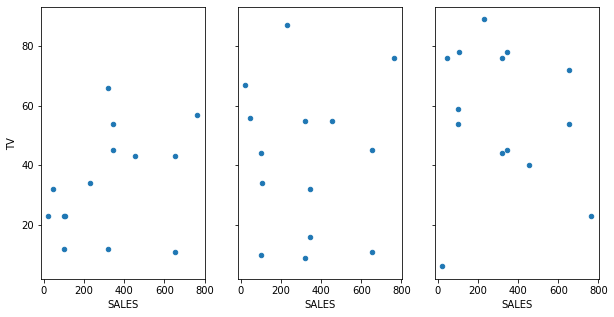

In [103]:
fig,axs=plt.subplots(1,3, sharey=True)
data.plot(kind='scatter',x='SALES',y='TV',ax=axs[0],figsize=(10,5))
data.plot(kind='scatter',x='SALES',y='RADIO',ax=axs[1])
data.plot(kind='scatter',x='SALES',y='NEWS PAPER',ax=axs[2])

In [128]:
feature_cols=['TV']
x=data[feature_cols]
y=data.SALES

In [129]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [130]:
print(lm.intercept_)
print(lm.coef_)

145.39128162241263
[5.09314238]


In [131]:
145.39+(5.09)*20

247.19

In [134]:
x_new= pd.DataFrame({'TV':[20]})
x_new.head()

,TV
0,20


In [135]:
lm.predict(x_new)

array([247.25412921])

In [136]:
x_new= pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
x_new.head()

,TV
0,11
1,66


In [138]:
pred=lm.predict(x_new)
pred

array([201.41584779, 481.53867865])

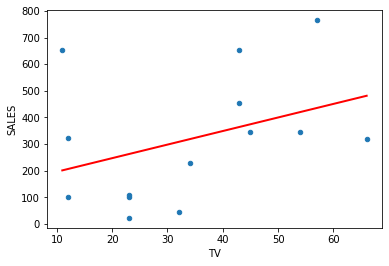

In [139]:
data.plot(kind='scatter',x='TV',y='SALES')
plt.plot(x_new,pred,c='red',linewidth=2)

In [140]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='SALES~TV',data=data).fit()

In [141]:
lm.conf_int()

,0,1
Intercept,-156.543153,447.325716
TV,-2.812712,12.998996


In [142]:
lm.pvalues

Intercept    0.314772
TV           0.185770
dtype: float64

In [143]:
lm.rsquared

0.1410297593758716

In [161]:
feature_cols=['TV','RADIO','NEWS PAPER']
x=data[feature_cols]
y=data.SALES

from sklearn import model_selection
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=0.3,random_state=42)

In [162]:
lm=LinearRegression()
lm.fit(x,y)
print(lm.intercept_)
print(lm.coef_)

236.28869366663903
[ 5.95888689 -1.98274072 -0.63311516]


In [163]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [165]:
print(lm.intercept_)
print(lm.coef_)
prediction=lm.predict(xtrain)

101.72785725754116
[ 6.89849739 -1.04878251 -0.54029329]


In [170]:
lm=smf.ols(formula='SALES~TV+RADIO',data=data).fit()
lm.conf_int()
lm.summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SALES   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     1.140
Date:                Fri, 16 Dec 2022   Prob (F-statistic):              0.355
Time:                        15:25:53   Log-Likelihood:                -94.806
No. Observations:                  14   AIC:                             195.6
Df Residuals:                      11   BIC:                             197.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    187.1331    156.478      1.196      0.257    -157.272     531.538
TV             6.1606      4.081      1.510      0.159      -2.821      15.142
RADIO         -1.8335      2.875     -0.638      0.537      -8.161       4.493
==============================================================================
Omnibus:                        2.473   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.845
Skew:                           0.815   Prob(JB):                        0.398
Kurtosis:                       2.290   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
np.random.seed(12345)

nums=np.random.rand(len(data))
mask_large=nums>0.5

data['size']='small'
data.loc[mask_large,'size']='large'
data.head()

,TV,RADIO,NEWS PAPER,SALES,size
S/N,,,,,
1,23,10,54,102,large
2,45,16,78,344,small
3,34,87,89,231,small
4,23,67,6,23,small
5,32,56,76,45,large


In [197]:
np.random.seed(123456)

nums=np.random.rand(len(data))
mask_suburban= (nums>0.33)&(nums<0.66)
mask_urban=nums>0.66
data['AREA']='rural'
data.loc[mask_suburban,'AREA']='suburban'
data.loc[mask_urban,'AREA']='urban'
data.head()

,TV,RADIO,NEWS PAPER,SALES,size,AREA,DUMMY
S/N,,,,,,,
1,23,10,54,102,large,rural,1
2,45,16,78,344,small,urban,1
3,34,87,89,231,small,rural,1
4,23,67,6,23,small,urban,1
5,32,56,76,45,large,suburban,1
